<a href="https://colab.research.google.com/github/rishabhm4/Denoising-CT-Dicom-data-using-DL-approach-/blob/Autoencoder/Autoencoder_CT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.7 MB/s eta 0:00:00


In [2]:
import os
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
os.chdir('gdrive/MyDrive/Thesis/CT_Dataset')

In [21]:
os.getcwd()
from skimage.transform import rescale, resize, downscale_local_mean

In [10]:
#Resolution of the image
image_path1 = 'Lung_dicom/dataset1/1-150.dcm'
ds1= dicom.dcmread(image_path1)
ds1.pixel_array.shape

(512, 512)

Text(0.5, 1.0, '1-50')

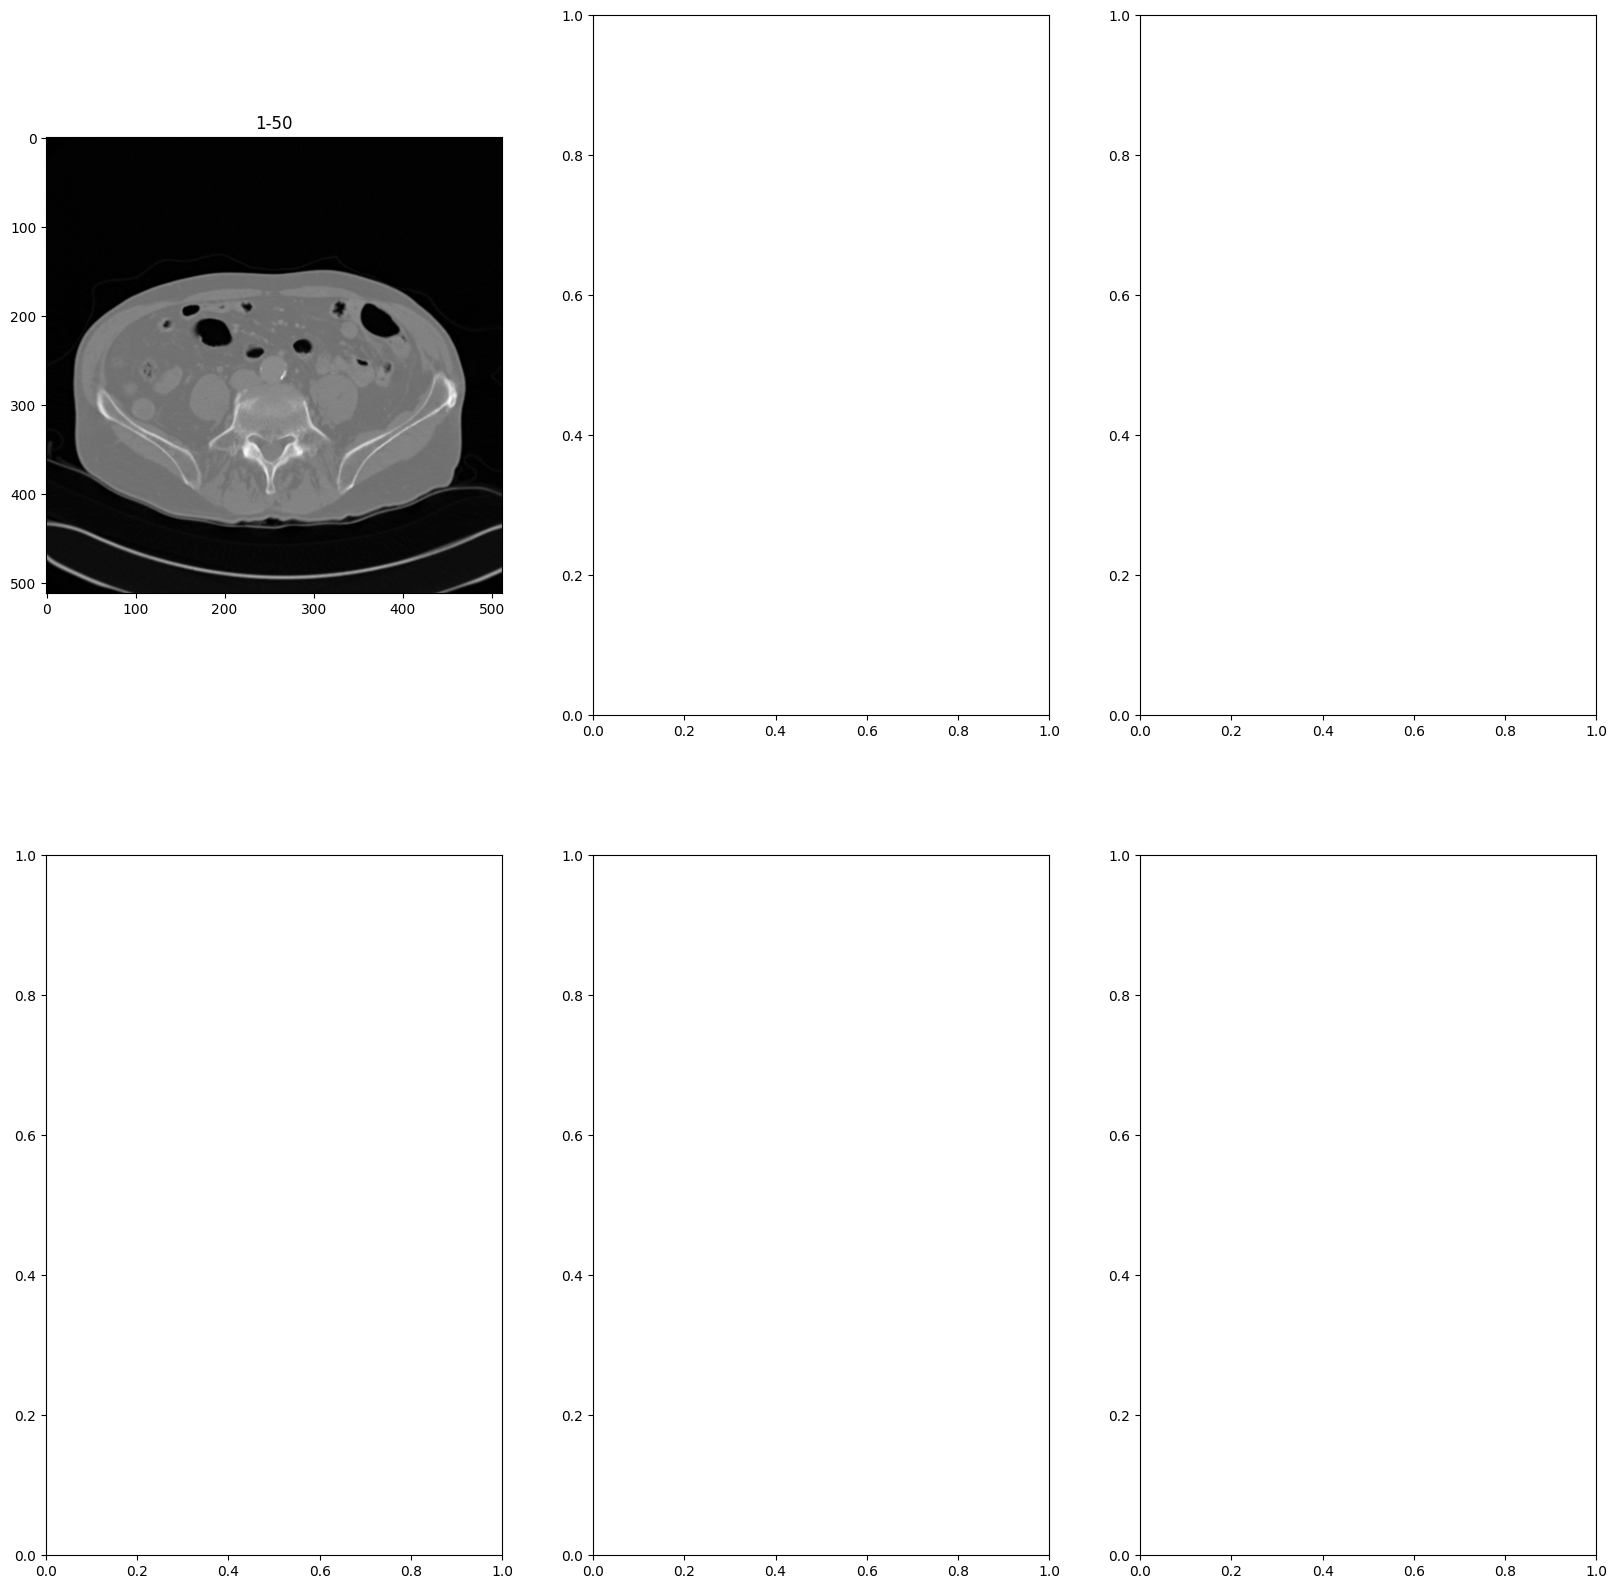

In [11]:
fig, axs = plt.subplots(2,3,figsize=(20,20))
axs[0,0].imshow(ds1.pixel_array,cmap='Greys_r'); axs[0,0].set_title('1-50')

In [7]:
#Lung CT diagnosis
#SERIES UID: 1.3.6.1.4.1.14519.5.2.1.4320.5030.261781697101054597239292572759
#Imaging details: Diagnostic Pre-Surgery Contrast Enhanced CT
#Image 1
image_path1 = '/Lung_dicom/dataset1/1-050.dcm'
ds1= dicom.dcmread(image_path1)

fig, axs = plt.subplots(2,3,figsize=(20,20))
axs[0,0].imshow(ds1.pixel_array,cmap='Greys_r'); axs[0,0].set_title('1-50')

#Image 2
image_path2 = 'Lung_dicom/dataset1/1-055.dcm'
ds2= dicom.dcmread(image_path2)
axs[0,1].imshow(ds2.pixel_array,cmap='Greys_r'); axs[0,1].set_title('1-55')

#Image 3
image_path3 = 'Lung_dicom/dataset1/1-060.dcm'
ds3= dicom.dcmread(image_path3)
axs[0,2].imshow(ds3.pixel_array,cmap='Greys_r'); axs[0,2].set_title('1-060')

#Image 4
image_path4 = 'Lung_dicom/dataset1/1-033.dcm'
ds4= dicom.dcmread(image_path4)
axs[1,0].imshow(ds4.pixel_array,cmap='Greys_r'); axs[1,0].set_title('1-033')


#Image 5
image_path5 = 'Lung_dicom/dataset1/1-066.dcm'
ds5= dicom.dcmread(image_path5)
axs[1,1].imshow(ds5.pixel_array,cmap='Greys_r'); axs[1,1].set_title('1-066')

#Image 6
image_path5 = 'Lung_dicom/dataset1/1-040.dcm'
ds5= dicom.dcmread(image_path5)
axs[1,2].imshow(ds5.pixel_array,cmap='Greys_r'); axs[1,2].set_title('1-040')

plt.show(block=True)


#plt.subplots



FileNotFoundError: [Errno 2] No such file or directory: 'Lung_dicom/dataset1/1-050.dcm'

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from math import log10,sqrt
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [12]:
#Converting dicom to numpy array
import pydicom
dicom = pydicom.read_file('Lung_dicom/dataset1/1-111.dcm')
data_voi=apply_voi_lut(dicom.pixel_array,dicom)
data_voi

array([[ 823.36842105,  823.36842105,  823.36842105, ..., 1049.15789474,
        1059.42105263, 1110.73684211],
       [ 823.36842105,  823.36842105,  823.36842105, ..., 1038.89473684,
        1090.21052632, 1141.52631579],
       [ 823.36842105,  823.36842105,  823.36842105, ..., 1090.21052632,
        1121.        , 1110.73684211],
       ...,
       [ 823.36842105,  823.36842105,  823.36842105, ..., 1049.15789474,
        1008.10526316,  987.57894737],
       [ 823.36842105,  823.36842105,  823.36842105, ..., 1038.89473684,
        1090.21052632, 1038.89473684],
       [ 823.36842105,  823.36842105,  823.36842105, ...,  874.68421053,
         987.57894737, 1038.89473684]])

In [19]:
import glob
import pydicom
pixel_data =[]
paths = glob.glob('Lung_dicom/sample_dataset/*.dcm')
paths

['Lung_dicom/sample_dataset/1-018.dcm',
 'Lung_dicom/sample_dataset/1-017.dcm',
 'Lung_dicom/sample_dataset/1-019.dcm',
 'Lung_dicom/sample_dataset/1-021.dcm',
 'Lung_dicom/sample_dataset/1-020.dcm',
 'Lung_dicom/sample_dataset/1-022.dcm',
 'Lung_dicom/sample_dataset/1-023.dcm',
 'Lung_dicom/sample_dataset/1-024.dcm',
 'Lung_dicom/sample_dataset/1-025.dcm',
 'Lung_dicom/sample_dataset/1-027.dcm',
 'Lung_dicom/sample_dataset/1-028.dcm',
 'Lung_dicom/sample_dataset/1-026.dcm',
 'Lung_dicom/sample_dataset/1-029.dcm',
 'Lung_dicom/sample_dataset/1-030.dcm',
 'Lung_dicom/sample_dataset/1-031.dcm',
 'Lung_dicom/sample_dataset/1-032.dcm',
 'Lung_dicom/sample_dataset/1-033.dcm',
 'Lung_dicom/sample_dataset/1-034.dcm',
 'Lung_dicom/sample_dataset/1-035.dcm',
 'Lung_dicom/sample_dataset/1-038.dcm',
 'Lung_dicom/sample_dataset/1-036.dcm',
 'Lung_dicom/sample_dataset/1-037.dcm',
 'Lung_dicom/sample_dataset/1-042.dcm',
 'Lung_dicom/sample_dataset/1-040.dcm',
 'Lung_dicom/sample_dataset/1-041.dcm',


In [23]:
#Loading Dicom file to array
for path in paths:
  dataset=pydicom.dcmread(path)
  #Converting dicom to numpy array
  data_voi=apply_voi_lut(dataset.pixel_array,dataset)
  data_voi = data_voi - np.min(data_voi)
  data_voi = data_voi / np.max(data_voi)
  data_voi = (data_voi*255).astype(np.float32)
  img=image.img_to_array(data_voi)
  #normalizing pixel values
  img=img/255
  #resizing resolution to 128x128
  img = resize(img,(128,128))
  pixel_data.append(img)

In [24]:
train_df=[]
train_df = np.array(pixel_data)

In [25]:
#Subplotting images
def plot_img(dataset):
  f,ax=plt.subplots(1,5)
  f.set_size_inches(40,20)
  for i in range(5,10):
    ax[i-5].imshow(dataset[i], cmap='gray')
  plt.show()


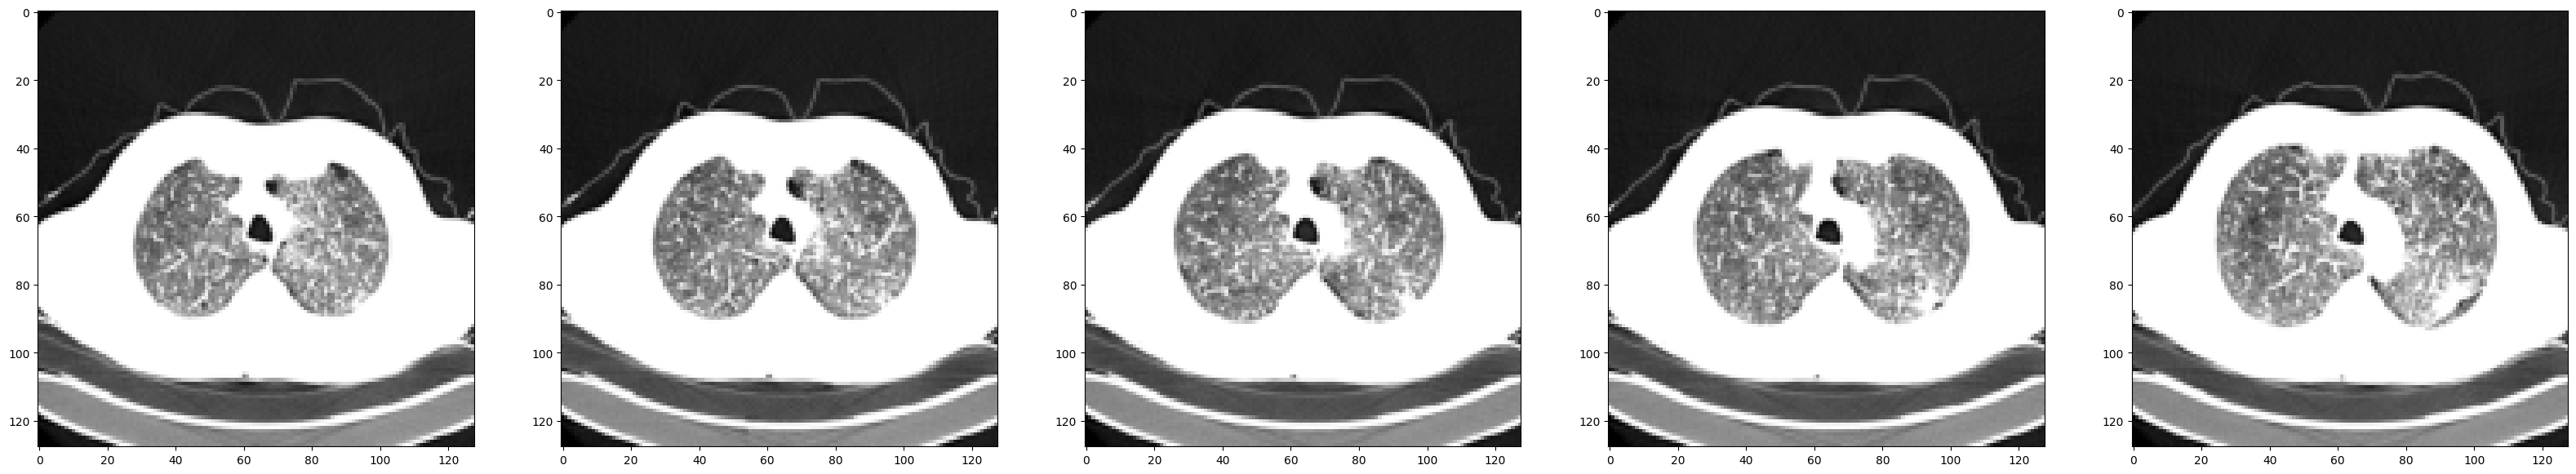

In [26]:
plot_img(train_df)

In [27]:
#Adding gaussian noise with 0.05 factor
def add_noise(image):
  row,col,ch=image.shape
  mean=0
  sigma=1
  gauss=np.random.normal(mean,sigma,(row,col,ch))
  gauss=gauss.reshape(row,col,ch)
  noisy=image+gauss*0.05
  return noisy

In [28]:
noised_df=[]
for img in train_df:
  noisy=add_noise(img)
  noised_df.append(noisy)

noised_df=np.array(noised_df)

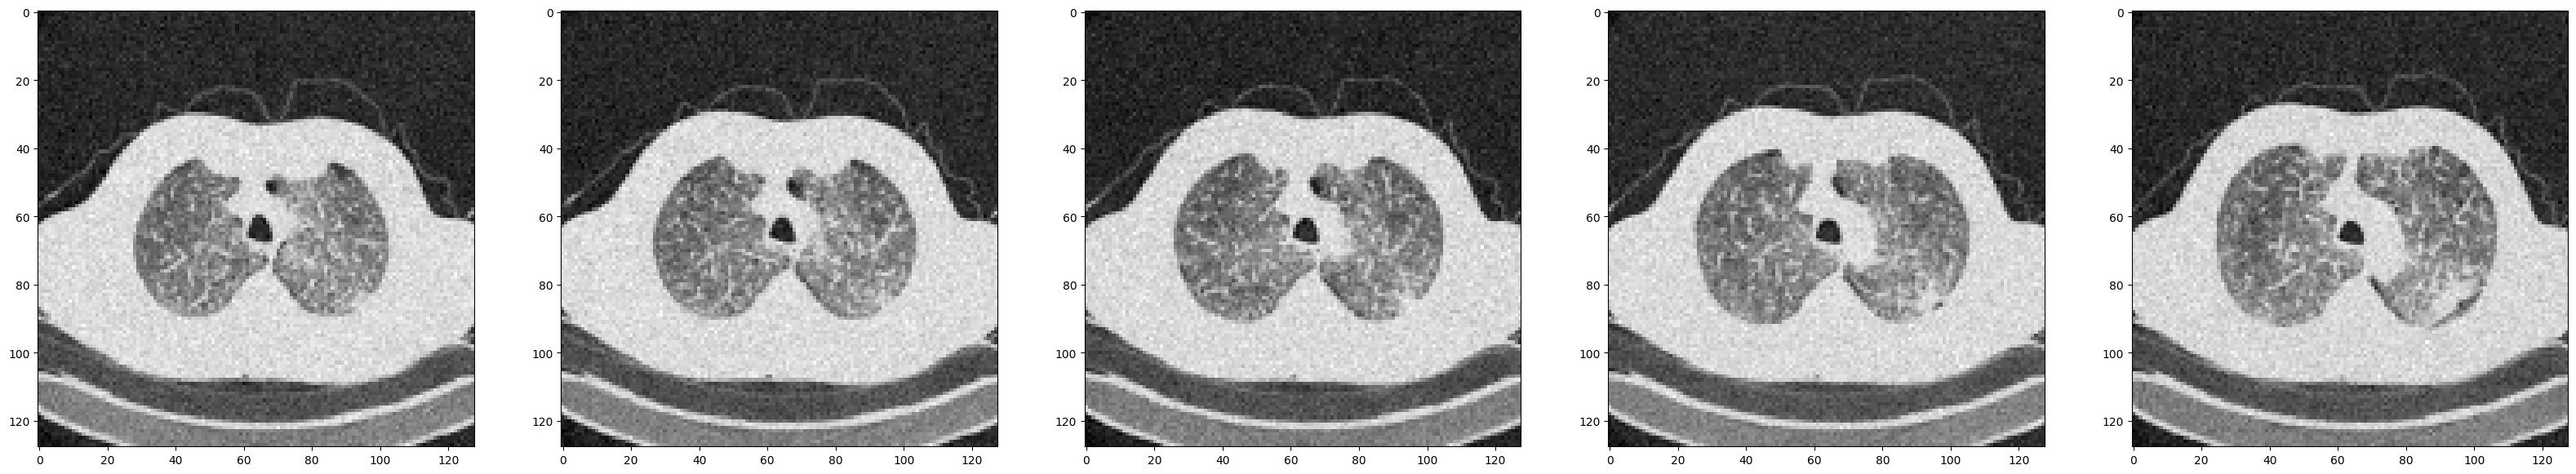

In [29]:
plot_img(noised_df)

In [41]:
# Train & Test split
# Select ratio
ratio = 0.75
total_rows = noised_df.shape[0]
train_size = int(total_rows*ratio)
#Training data should be atleast 32 images else it will return error
# Split data into test and train
xnoised = noised_df[0:train_size]
xtest = noised_df[train_size:]

In [44]:
print('Train data image cnt=',xnoised.shape[0])
print('Test data image cnt=',xtest.shape[0])

Train data image cnt= 103
Test data image cnt= 35


In [45]:
#Autoencoder model
def autoencoder():
  input_img=Input(shape=(128,128,1),name='image_input')
  #encoder
  x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
  x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
  x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv2')(x)
  x = MaxPooling2D((2,2), padding='same', name='pool2')(x)

  #decoder
  x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv3')(x)
  x = UpSampling2D((2,2), name='upsample1')(x)
  x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv4')(x)
  x = UpSampling2D((2,2), name='upsample2')(x)
  x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)

  #model
  autoencoder = Model(inputs=input_img, outputs=x)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

  return autoencoder

In [46]:
model= autoencoder()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 128, 128, 128)     1280      
                                                                 
 pool1 (MaxPooling2D)        (None, 64, 64, 128)       0         
                                                                 
 Conv2 (Conv2D)              (None, 64, 64, 128)       147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 32, 32, 128)       0         
                                                                 
 Conv3 (Conv2D)              (None, 32, 32, 128)       147584    
                                                                 
 upsample1 (UpSampling2D)    (None, 64, 64, 128)       0     

In [47]:
with tf.device('/device:GPU:0'):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    model.fit(xnoised, xnoised, epochs=15, batch_size=20, validation_data=(xtest, xtest), callbacks=[early_stopping])

Epoch 1/15
6/6 [==============================] - 39s 6s/step - loss: 0.6392 - val_loss: 0.6037
Epoch 2/15
6/6 [==============================] - 33s 6s/step - loss: 0.5436 - val_loss: 0.5401
Epoch 3/15
6/6 [==============================] - 35s 6s/step - loss: 0.4622 - val_loss: 0.4679
Epoch 4/15
6/6 [==============================] - 36s 6s/step - loss: 0.4362 - val_loss: 0.4612
Epoch 5/15
6/6 [==============================] - 33s 6s/step - loss: 0.4265 - val_loss: 0.4507
Epoch 6/15
6/6 [==============================] - 33s 6s/step - loss: 0.4183 - val_loss: 0.4385
Epoch 7/15
6/6 [==============================] - 36s 6s/step - loss: 0.4109 - val_loss: 0.4314
Epoch 8/15
6/6 [==============================] - 33s 6s/step - loss: 0.4058 - val_loss: 0.4263
Epoch 9/15
6/6 [==============================] - 33s 6s/step - loss: 0.4015 - val_loss: 0.4221
Epoch 10/15
6/6 [==============================] - 37s 6s/step - loss: 0.3975 - val_loss: 0.4180
Epoch 11/15
6/6 [======================

In [50]:
xtrain= train_df[100:]

1/1 [==============================] - 0s 338ms/step


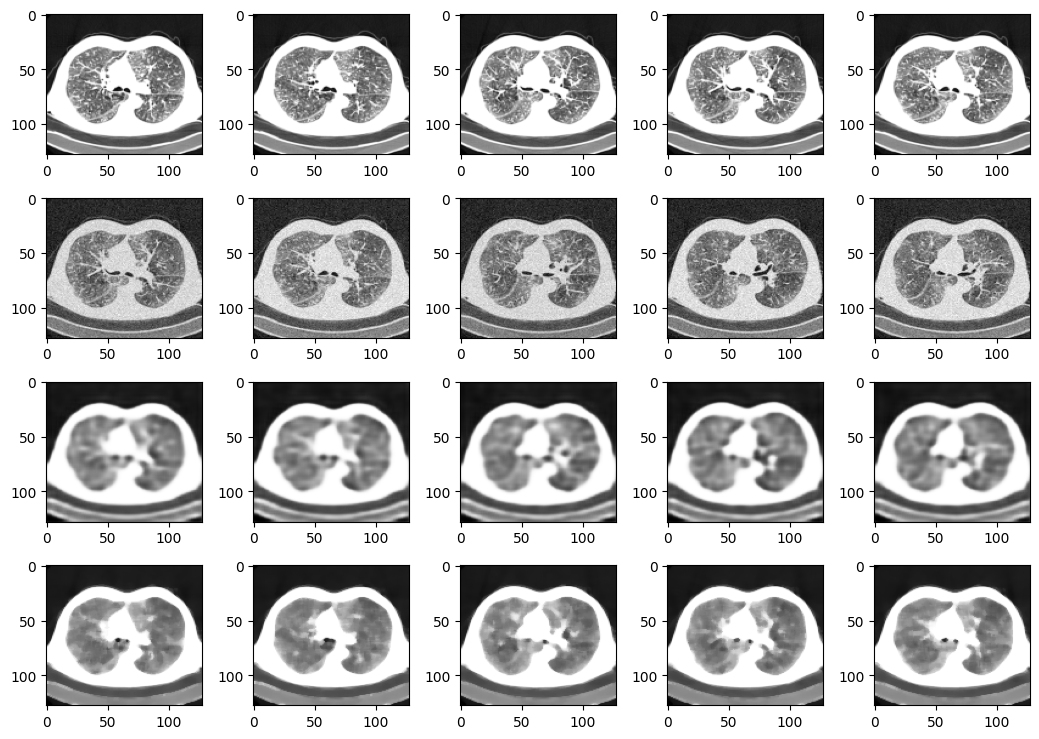

In [51]:
pred= model.predict(xtest[:5])
def plot_predictions(y_true, y_pred):
    f, ax = plt.subplots(4, 5)
    f.set_size_inches(10.5,7.5)
    for i in range(5):
        print('Original image')
        ax[0][i].imshow(np.reshape(xtrain[i], (128,128)), aspect='auto', cmap='gray')
        ax[1][i].imshow(np.reshape(y_true[i], (128,128)), aspect='auto', cmap='gray')
        ax[2][i].imshow(np.reshape(y_pred[i], (128,128)), aspect='auto', cmap='gray')
        ax[3][i].imshow(cv2.medianBlur(xtrain[i], (5)), aspect='auto', cmap='gray')
    plt.tight_layout()
plot_predictions(xtest[:5], pred[:5])

Text(0.5, 1.0, 'Bilateral Filter')

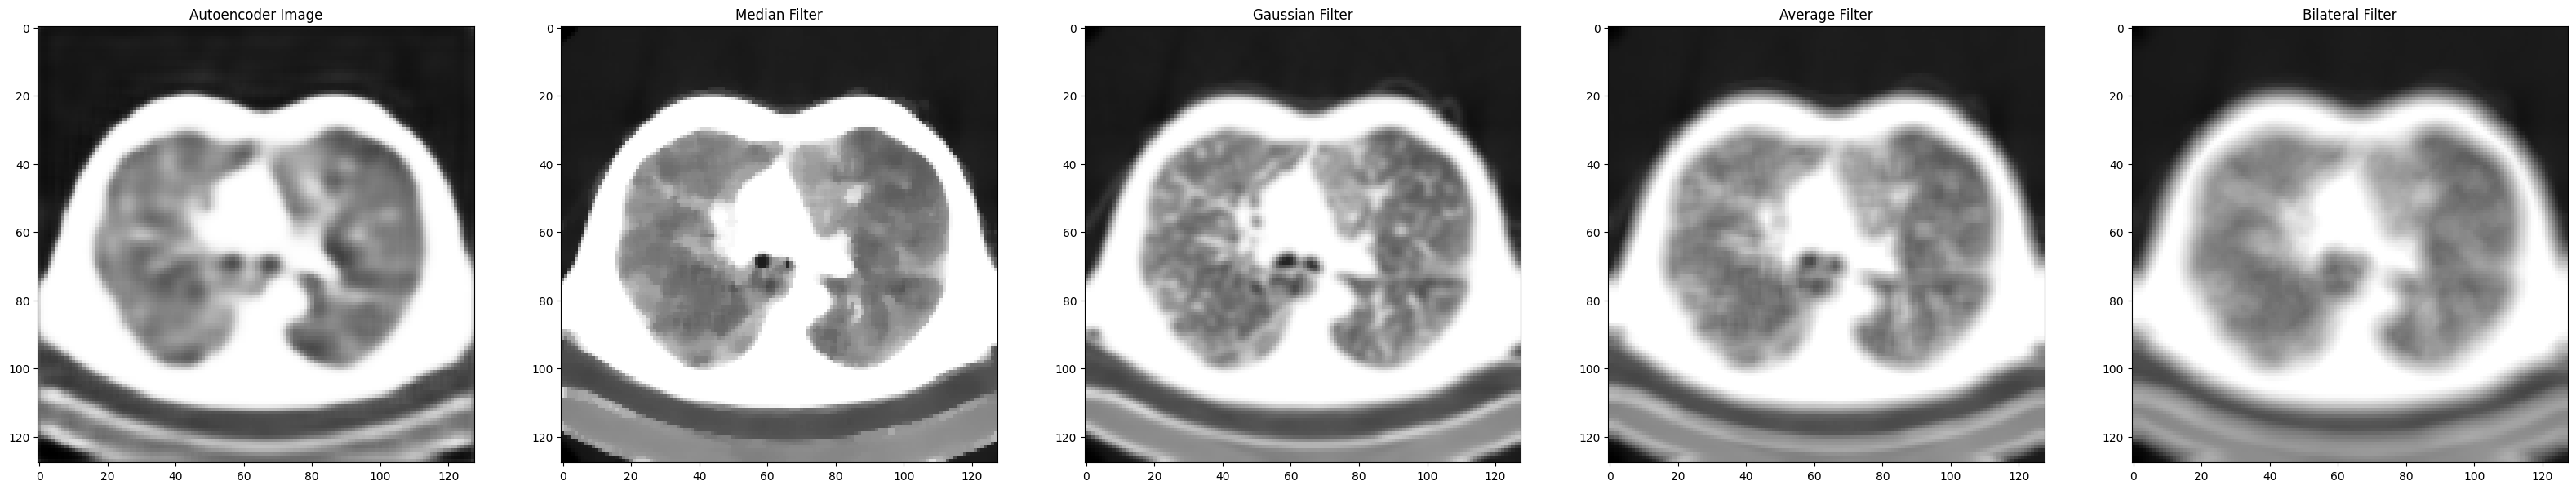

In [53]:

median_blur = cv2.medianBlur(xtrain[0], (5))
gaussian_blur=cv2.GaussianBlur(xtrain[0],(5,5),0)
average_blur=cv2.blur(xtrain[0],(5,5))
bilateral_filter=cv2.bilateralFilter(xtrain[0],9,75,75)
f,ax=plt.subplots(1,5)
f.set_size_inches(40,20)
ax[0].imshow(pred[0].reshape(128,128), cmap='gray')
ax[0].set_title('Autoencoder Image')
ax[1].imshow(median_blur,cmap='gray')
ax[1].set_title('Median Filter')
ax[2].imshow(gaussian_blur,cmap='gray')
ax[2].set_title('Gaussian Filter')
ax[3].imshow(average_blur,cmap='gray')
ax[3].set_title('Average Filter')
ax[4].imshow(bilateral_filter,cmap='gray')
ax[4].set_title('Bilateral Filter')

In [54]:
def PSNR(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


value1 = PSNR(xtest[0], median_blur)
value2 = PSNR(xtest[0], pred[0])
value3 = PSNR(xtest[0], gaussian_blur)
value4 = PSNR(xtest[0], average_blur)
value5 = PSNR(xtest[0], bilateral_filter)

print("PSNR values")
print(f"Autoencoder Image : {value2} dB")
print(f"Median Filter Image : {value1} dB")
print(f"Gaussian Filter Image : {value3} dB")
print(f"Average Filter Image : {value4} dB")
print(f"Bilateral Filter Image : {value5} dB")

PSNR values
Autoencoder Image : 67.59057422111374 dB
Median Filter Image : 54.71866816793924 dB
Gaussian Filter Image : 54.878430418349964 dB
Average Filter Image : 54.99747763539642 dB
Bilateral Filter Image : 55.143381368847166 dB


In [ ]:
os.

array([[ 0,  0,  0, ..., 26, 27, 24],
       [ 0,  0,  0, ..., 30, 22, 18],
       [ 0,  0,  0, ..., 32, 20, 22],
       ...,
       [ 0,  0,  0, ..., 30, 26, 22],
       [ 0,  0,  0, ..., 22, 27, 25],
       [ 0,  0,  0, ..., 13, 15, 25]], dtype=uint8)
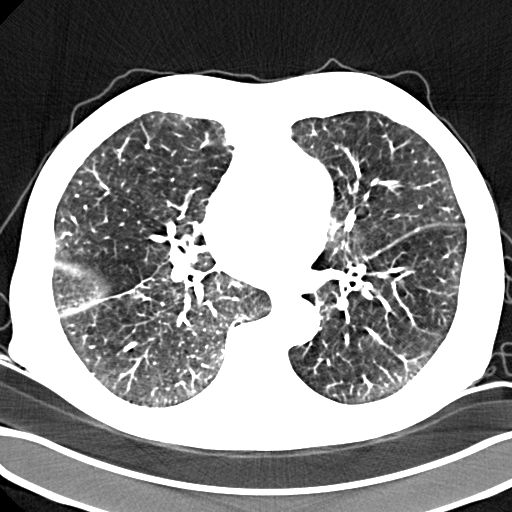

In [ ]:
data_voi = data_voi - np.min(data_voi)
data_voi = data_voi / np.max(data_voi)
#data_voi = (data_voi * 255).astype(np.uint8)
data_voi = (data_voi*255).astype(np.uint8)
data_voi

In [ ]:
#img=image.load_img(dicom,target_size=(64,64),color_mode='grayscale')
img=image.img_to_array(data_voi)
img=img/255
img
#plt.imshow(img.reshape(64,64),cmap='gray')

array([[[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.10196079],
        [0.10588235],
        [0.09411765]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.11764706],
        [0.08627451],
        [0.07058824]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.1254902 ],
        [0.07843138],
        [0.08627451]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.11764706],
        [0.10196079],
        [0.08627451]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.08627451],
        [0.10588235],
        [0.09803922]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.05098039],
        [0.05882353],
        [0.09803922]]], dtype=float32)

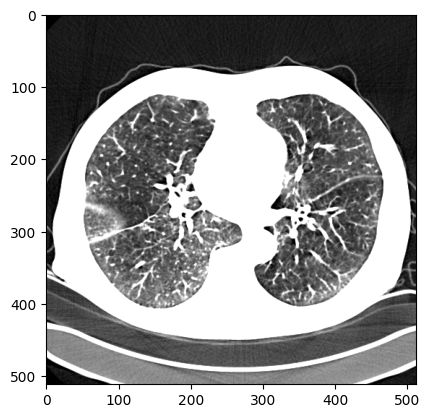

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
from skimage.transform import resize
import cv2
import pydicom
import numpy as np
from matplotlib import pyplot as plt
img = resize(img,(128,128))

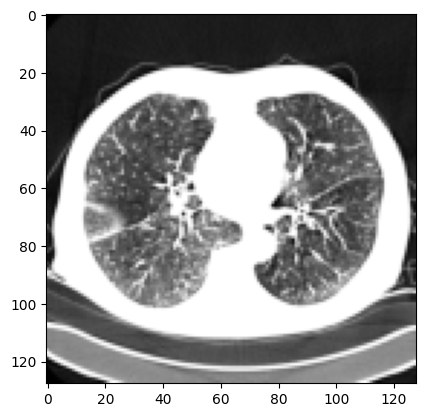

In [ ]:
img.shape
plt.imshow(img,cmap='gray')

In [ ]:
#Preparing Training data for the model
train_image=[]
train_image.append(img)

In [ ]:
train_df=np.array(train_image)

In [ ]:
#Adding gaussian noise with 0.05 factor - To be able to test denoising
def add_noise(image):
  row,col,ch=image.shape
  mean=0
  sigma=1
  gauss=np.random.normal(mean,sigma,(row,col,ch))
  gauss=gauss.reshape(row,col,ch)
  noisy=image+gauss*0.05
  return noisy

In [ ]:
noised_df=[]
for img in train_df:
  noisy=add_noise(img)
  noised_df.append(noisy)

noised_df=np.array(noised_df)

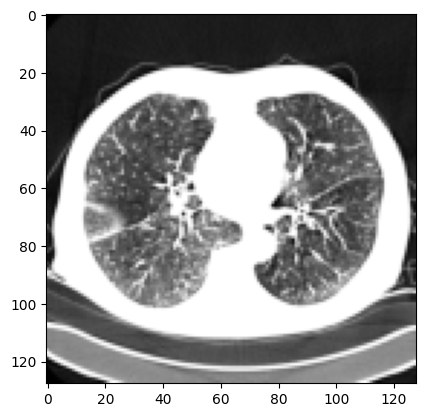

In [ ]:
#Show training data
plt.imshow(img,cmap='gray')

In [ ]:
#Show training data
plt.imshow(noised_df[1],cmap='gray')

IndexError: index 1 is out of bounds for axis 0 with size 0

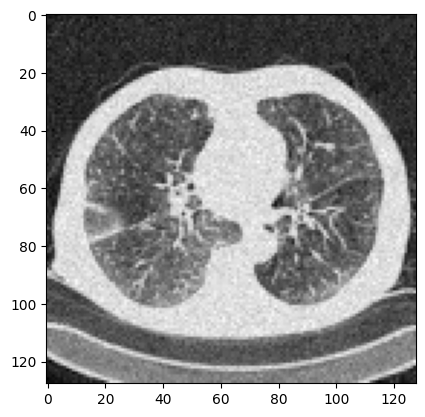

In [ ]:
#Show Noisy data - work to print out single
row,col,ch=img.shape
mean=0
sigma=1
gauss=np.random.normal(mean,sigma,(row,col,ch))
gauss=gauss.reshape(row,col,ch)
noisy=img+gauss*0.05
plt.imshow(noisy,cmap='gray')

In [ ]:
xnoised=noised_df

#xtest add sample data to test
xtest=noised_df

Work on adding more train data to be able to be define train and test data

In [ ]:
#Autoencoder model
def autoencoder():
  input_img=Input(shape=(128,128,1),name='image_input')
  #encoder
  x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
  x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
  x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv2')(x)
  x = MaxPooling2D((2,2), padding='same', name='pool2')(x)

  #decoder
  x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv3')(x)
  x = UpSampling2D((2,2), name='upsample1')(x)
  x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv4')(x)
  x = UpSampling2D((2,2), name='upsample2')(x)
  x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)

  #model
  autoencoder = Model(inputs=input_img, outputs=x)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

  return autoencoder

In [ ]:
model= autoencoder()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 128, 128, 128)     1280      
                                                                 
 pool1 (MaxPooling2D)        (None, 64, 64, 128)       0         
                                                                 
 Conv2 (Conv2D)              (None, 64, 64, 128)       147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 32, 32, 128)       0         
                                                                 
 Conv3 (Conv2D)              (None, 32, 32, 128)       147584    
                                                                 
 upsample1 (UpSampling2D)    (None, 64, 64, 128)       0     

In [ ]:
with tf.device('/device:GPU:0'):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    model.fit(xnoised, xnoised, epochs=18, batch_size=10, validation_data=(xtest, xtest), callbacks=[early_stopping])

ValueError: Expected input data to be non-empty.

In [ ]:
img.resize((64,64))

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False